#  Linear Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Link to the dataset.
https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

A version of the dataset is in the ZIP file where you got this notebook.

In [1]:
#put here your ``numero di matricola''
ID_number = 2008571

In [2]:
# to get in-line plots
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import fidx

## Import Data
Load the data from a .csv file


In [3]:
np.random.seed(ID_number)

filename = "kc_house_data.csv"

#load the data (df is the data frame)
df = pd.read_csv(filename, sep = ',')

#let's print out the data
print(df)

              id             date     price  bedrooms  bathrooms  sqft_living  \
0     7129300520  20141013T000000  221900.0         3       1.00         1180   
1     6414100192  20141209T000000  538000.0         3       2.25         2570   
2     5631500400  20150225T000000  180000.0         2       1.00          770   
3     2487200875  20141209T000000  604000.0         4       3.00         1960   
4     1954400510  20150218T000000  510000.0         3       2.00         1680   
...          ...              ...       ...       ...        ...          ...   
3160  2759800110  20141031T000000  485000.0         3       2.50         1840   
3161   579000096  20141010T000000  780000.0         3       1.50         1620   
3162  9169600096  20140801T000000  720000.0         2       1.50         1840   
3163  1226059112  20150220T000000  415000.0         3       1.00         1360   
3164  6021503830  20140620T000000  480000.0         4       1.00         2080   

      sqft_lot  floors  wat

# A quick overview of data

Now let's clean the data and inspect it using the method describe().

In [4]:
#remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()
#for more interesting visualization: use Pandas!

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using features other than id as input.

# Split data in training and test set

Given $m$ total data, keep $m_t$ data as training data, and $m_{test}:=m - m_t$ for test data. For instance one can take $m_t=\frac{3}{4}m $ of the data as training, and $m_{test}=\frac{m}{4}$ as testing. Let us define
- $S_{t}$ the training data set
- $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to get $h_S$ in a given model class ${\cal H}$.
i.e. 
$$
h_S = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: Last, the test data set can be used to estimate the performance of the chosen hypothesis $h_{S}$ using:

$$
L_{\cal D}(h_S)  \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(h_{S},z_i)
$$

**TO DO: split the data in training and test sets (suggestion: use $m_t=\left\lfloor\frac{3}{4}m\right\rfloor $, $m_{test} = m-m_t$)**

In [5]:
#let's consider only the values in the DataFrame
Data = fidx(df.values) # observed values without header

# m = number of input samples
m = Data.shape[0]

print("Total number of samples: ", m)

#size of training dataset
size_training = 3/4

print("Number of samples in training data: ", int(size_training*m))

#shuffle the data (to make sure we get a random split)

np.random.shuffle(Data)

#divide data into matrix X of features and target vector Y 
#Data: id, date, price, bedrooms, bathrooms, ...
Y = Data[:,2]
X = Data[:,3:]

#training data

X_training = X[:size_training]
Y_training = Y[:size_training]
print("Training input data size: ", X_training.shape)
print("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model
X_test = X[size_training:]
Y_test = Y[size_training:]
print("Test input data size: ", X_test.shape)
print("Test output data size: ", Y_test.shape)

Total number of samples:  3164
Number of samples in training data:  2373
Training input data size:  (2373, 18)
Training output data size:  (2373,)
Test input data size:  (791, 18)
Test output data size:  (791,)


# Data Normalization

It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to $1$. This helps in terms of numerical conditioning of the (inverse) problems of learning the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients. 

In [6]:
# scale the data: standardize the training feature matrix
from sklearn import preprocessing

# create scaler
scaler = preprocessing.StandardScaler().fit(X_training)

# apply scaler
X_training_scaled = scaler.transform(X_training)
print("Mean of the training input data:", X_training_scaled.mean(axis=0))
print("Std of the training input data:",X_training_scaled.std(axis=0))

# now we scale the test feature matrix using the same transformation used
# for the training dataset, since the weights of the model will be learned
# data scaled according to such transformation

X_test_scaled = scaler.transform(X_test)
print("Mean of the test input data:", X_test_scaled.mean(axis=0))
print("Std of the test input data:", X_test_scaled.std(axis=0))



Mean of the training input data: [-3.89256450e-17  1.58696860e-16 -5.98856077e-17 -7.48570097e-18
 -7.71027200e-17 -7.48570097e-18  1.94628225e-17 -2.84456637e-17
 -2.88199487e-16 -3.59313646e-17 -3.06913740e-17  4.05088708e-15
  2.05856777e-17  5.37989843e-14  6.89358202e-15  6.00787388e-14
 -5.46456171e-17  2.39542431e-17]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [ 0.10893131  0.05266111  0.09657323 -0.01278259  0.06161283 -0.01263497
  0.04554818  0.00681129  0.08835177  0.07299368  0.06355972 -0.01530372
 -0.00360047  0.01754537  0.1076239  -0.01678683  0.08147393 -0.03957843]
Std of the test input data: [1.02042265 1.06045221 1.00857026 0.68304271 1.01102848 0.93601148
 1.04165076 1.0112514  1.00512146 0.97726657 1.05766696 1.01611013
 0.9931503  1.02666187 0.97052327 0.9711525  1.02742414 0.78206701]


# Model Training 

The model is trained minimizing the empirical error
$$
L_S(h) := \frac{1}{N_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.

The least squares solution is given by the expression
$$
\hat w = {\rm arg\;min}_w L_S(w) = (X^\top X)^{-1} X^\top Y
$$
When the matrix $X$ is not invertible (or even when it is invertible), the solution can be computed using the Moore-Penrose pseudonverse $(X^\top X)^{\dagger}$ of $(X^\top X)$
$$
\hat w = (X^\top X)^{\dagger} X^\top Y
$$
The Moore-Penrose pseudoinverse $A^\dagger$ of a matrix $A \in \mathbb{R}^{m\times n}$ can be expressed in terms of the Singular Value Decomposition (SVD) as follows:
let $A\in \mathbb{R}^{m\times n}$ be of rank $r\leq {\rm min}(n,m)$ and let  
$$
 A = USV^\top
 $$
 be the singular value decomposition of  $A$ where  
 $$
 S = {\rm diag}\{s_1,s_2,..,s_r\}
 $$
 Then 
 $$
 A^\dagger =V S^{-1} U^\top 
 $$
 
 In practice some of the singular values may be very small (e.g. $<1e-10$). Therefore it makes sense to  first approximate the matrix $A$ truncating the SVD and then using the pseudoinverse formula.
 
 More specifically, let us postulate that, given a threshold $T_h$ (e.g $=1e-12$), we have $\sigma_i<T_h$, for $i=\hat r + 1,..,r$. Then we can approximate (by SVD truncation) $A$ using:
 
 $$A = USV^\top =U \,{\rm diag}\{s_1,s_2,..,s_r\}\, V^\top \simeq \hat A_r = U\,{\rm diag}\{s_1,s_2,..,s_{\hat r}, 0,..,0\}\,V^\top
 $$
 So that 
 $$
 A^\dagger \simeq \hat A_r^\dagger:= V \,{\rm diag}\{1/s_1,1/s_2,..,1/s_{\hat r}, 0,..,0\}\, U^\top
 $$
  
 In numpy, the Moore-Penrose pseudo-inverse of a matrix can be computed using the method numpy.linalg.pinv(...), which takes among its parameters the threshold for truncating the singular values to 0.
  
 **TO DO: compute the linear regression coefficients according to the description above (using numpy.linalg.pinv(...) )**

In [7]:
#compute linear regression coefficients for training data

#number of samples in the training set
m_training = X_training_scaled.shape[0]

#number of samples in the test set
m_test = X_test_scaled.shape[0]

# add a 1 at the beginning of each sample for training, and testing
# the numpy function hstack is useful for such operation
X_training_prime = np.hstack((np.ones((m_training,1)), X_training_scaled))

X_test_prime = np.hstack((np.ones((m_test,1)), X_test_scaled))

# set precision under which singular values are considered as zeros
prec = 1e-10  

# compute Moore-Penrose pseudoinverse of the matrix you need to compute 
# the weights of the model
A_inv = np.linalg.pinv(X_training_prime.T @ X_training_prime, prec)

# now compute the weights and print them
w_hand = A_inv @ X_training_prime.T @ Y_training

print("LS coefficients by hand:", w_hand)

# compute Residual Sums of Squares by hand
RSStr_hand = np.linalg.norm(Y_training- X_training_prime @ w_hand)**2

# print the RSS
print("RSS by hand:",  RSStr_hand)

# print the empirical risk
print("Empirical risk by hand:", RSStr_hand/m_training)

LS coefficients by hand: [525281.5453013094 -34090.57351106246 29082.520887883544 76238.48811018064
 9319.512578620754 -2442.6541571355433 68926.76832198001 47028.1918286361
 14784.223507673305 99475.78757126612 71563.86676452866 24891.148684196105
 -72087.41409529338 4964.554715054372 -26335.386599303078
 84515.99980083188 -21559.284279160707 31861.57213764499
 -11026.508789907602]
RSS by hand: 92987841866521.6
Empirical risk by hand: 39185774069.330635


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS) defined above, the Empirical Loss and the quantity $R^2$ where
$$
R^2 = 1 - \frac{\sum_{z_i \in S_t} (y_i - \hat y_i )^2}{\sum_{z_i \in S_t} (y_i - \bar y)^2}  \quad \quad \bar y = \frac{1}{m_t} \sum_{z_i \in S_t} y_i
$$
is the so-called "Coefficient of determination" (COD).

**TO DO Compute these quantities on  training and test data.**


In [8]:
#compute predictions on training and test
prediction_training = X_training_prime @ w_hand
prediction_test = X_test_prime @ w_hand

#what about the RSS and empirical loss for points in the test data?
RSS_test = np.linalg.norm(Y_test - X_test_prime @ w_hand)**2

#print("RSS on test data:",  RSS_test)
print("Generalization error estimated on test data (i.e., empirical loss on test data):", RSS_test/m_test)

#another measure of how good our linear fit is given by the following (that is R^2)
measure_training = 1 - np.linalg.norm(Y_training - prediction_training)**2 / np.linalg.norm(Y_training - Y_training.mean())**2
measure_test = 1 - np.linalg.norm(Y_test - prediction_test)**2 / np.linalg.norm(Y_test - Y_test.mean())**2

print("Measure on Training Data (R^2):", measure_training)
print("Measure on Test Data(R^2):", measure_test)

Generalization error estimated on test data (i.e., empirical loss on test data): 46595466120.6941
Measure on Training Data (R^2): 0.7139019646223095
Measure on Test Data(R^2): 0.7226806394905909


## ... and plot:


### (1) output predictions on training  data

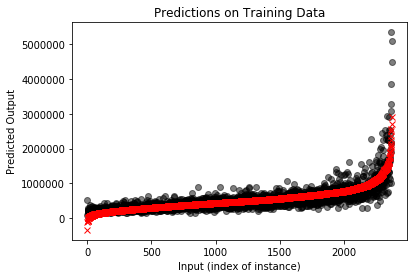

In [9]:
# Plot predictions on Training data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
# a line and it's easier to spot the differences
sorting_permutation = sorted(range(len(prediction_training[0:m_training])), key=lambda k: prediction_training[0:m_training][k])
plt.plot(Y_training[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_training[sorting_permutation], 'rx')

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Training Data')
plt.show()

### (2) output predictions on test  data

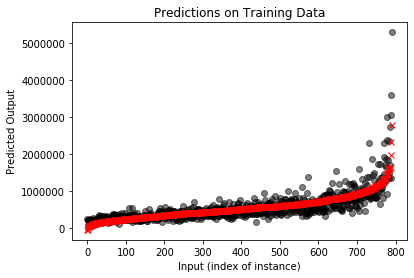

In [10]:
# Plot predictions on test data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
# a line and it's easier to spot the differences
sorting_permutation = sorted(range(len(prediction_test[0:m_training])), key=lambda k: prediction_test[0:m_test][k])
plt.plot(Y_test[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_test[sorting_permutation], 'rx')

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Training Data')
plt.show()

## Ordinary Least-Squares using scikit-learn

A fast way to compute the LS estimate is through sklearn.linear_model

In [11]:
# Remove the ``ones'' column in the features matrix (sklearn inserts it automatically)
X_training_OLS = X_training_scaled[:,1:]
X_test_OLS = X_test_scaled[:,1:]

In [12]:
from sklearn import linear_model
LinReg = linear_model.LinearRegression()  # build the object LinearRegression
LinReg.fit(X_training_OLS, Y_training)  # estimate the LS coefficients
print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)
prediction_training = LinReg.predict(X_training_OLS)  # predict output values on training set
prediction_test = LinReg.predict(X_test_OLS)  # predict output values on test set
print("Measure on training data:", LinReg.score(X_training_OLS, Y_training))
print("Measure on test data:", LinReg.score(X_test_OLS, Y_test))

Intercept: 525281.5453013087
Least-Squares Coefficients: [ 18796.27297156  66923.17664454   7478.48205185  -2493.62450953
  71259.31686186  49682.2684505   14708.12538483 104375.77122611
  63799.39174308  20072.80991555 -68439.84912419   5979.37973954
 -24664.00665378  86182.47326101 -20853.52982358  32815.78459036
  -7160.35300924]
Measure on training data: 0.7085461357985327
Measure on test data: 0.7196133926019056
